# advertising.csv
1. divide dataset into x & y

2. divide into training and testing set

3. perform Linear Regression

4. Display Regression Coefficient & do the interpretation of it

5. show evalution metrics usng mae, mse, rmse and r2 score


In [1]:
# import necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#read dataset
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<AxesSubplot:>

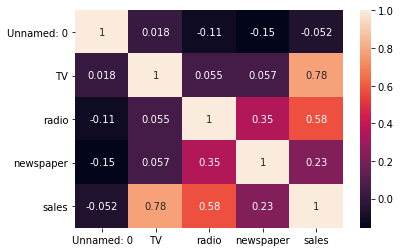

In [3]:
#check the correlation among data
sns.heatmap(df.corr(),annot=True) #sales is having highest with tv i.e 0.78

In [4]:
#select sales on y axis as it needs to be predicted
x=df.iloc[:,1:-1].values #[row:row,column:column]: 2D array
y=df.iloc[:,-1].values   #1D array

In [5]:
#As we want to predict sales find correlation with other rows
df.corr()['sales'].sort_values()

Unnamed: 0   -0.051616
newspaper     0.228299
radio         0.576223
TV            0.782224
sales         1.000000
Name: sales, dtype: float64

In [6]:
#create module:

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=1)

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)
ypred=linreg.predict(xtest)

In [7]:
#check coefficient wrt columns
linreg.coef_

array([0.04656457, 0.17915812, 0.00345046])

In [8]:
#intercept point will be single
linreg.intercept_

2.876966622317928

<AxesSubplot:ylabel='Density'>

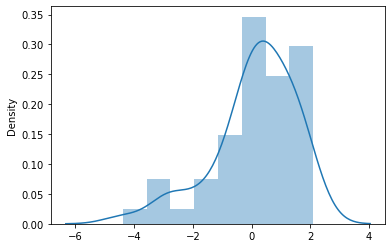

In [9]:
#visaulize difference or error
sns.distplot(ytest-ypred)

In [10]:
#convert x from array to df
x=df.iloc[:,1:-1]
#visualize coefficient values according to column names
coef_df = pd.DataFrame(linreg.coef_, x.columns, columns=["Coefficiet"])
coef_df

,Coefficiet
TV,0.046565
radio,0.179158
newspaper,0.003450


1. one point increment in TV, will increase sales by 0.0457 dollars
2. one point growth in radio, will increase sales by 0.1858 dollars
3. one point growth in newspaper,will increase sales by 0.004 dollars

In [11]:
from sklearn.metrics import mean_squared_error as mse, r2_score,mean_absolute_error as MAE

print(f'MSE-: {mse(ytest, ypred)}')
print(f'RMSE-: {np.sqrt(mse(ytest, ypred))}')
print(f'MAE-: {MAE(ytest,ypred)}')
print(f'r2_score-:{r2_score(ytest, ypred)}')

MSE-: 1.9730456202283377
RMSE-: 1.4046514230328953
MAE-: 1.0668917082595224
r2_score-:0.9156213613792232


- r2_score of 91.75 %, means we are having huge error as we can estimate from mse and mae and rmse which is bit high.
- we can reduce that by removing small variant that is newspaper which is very less correlated
- we can even check by changing random state values

In [12]:
x=df.iloc[:,1:-2]
y=df.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
linreg.fit(xtrain,ytrain)
ypred=linreg.predict(xtest)

In [14]:
#check coefficient wrt columns
linreg.coef_

array([0.04660234, 0.18117959])

In [15]:
#intercept point will be single
linreg.intercept_

2.927237320266485

<AxesSubplot:xlabel='sales', ylabel='Density'>

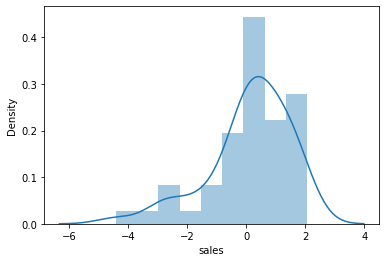

In [16]:
#visaulize difference or error
sns.distplot(ytest-ypred)

In [17]:
from sklearn.metrics import mean_squared_error as mse, r2_score,mean_absolute_error as MAE

print(f'MSE-: {mse(ytest, ypred)}')
print(f'RMSE-: {np.sqrt(mse(ytest, ypred))}')
print(f'MAE-: {MAE(ytest,ypred)}')
print(f'r2_score-:{r2_score(ytest, ypred)}')

MSE-: 1.9262760418667424
RMSE-: 1.3879034699382888
MAE-: 1.04775904112126
r2_score-:0.9176214942248908


r2_score has been increased after deleting unwanted newspaper column

In [18]:
from sklearn.model_selection import train_test_split
for i in range(1,100):
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=i)

    linreg=LinearRegression()
    linreg.fit(xtrain,ytrain)
    ypred=linreg.predict(xtest)
    
    print(f'random state:{i} {linreg.intercept_,(mse(ytest, ypred)),(np.sqrt(mse(ytest, ypred))),(r2_score(ytest, ypred))}')
    

random state:1 (2.927237320266485, 1.9262760418667424, 1.3879034699382888, 0.9176214942248908)
random state:2 (3.2612428667010995, 5.577882596751814, 2.361754135542439, 0.759079765679978)
random state:3 (3.2445472620395908, 3.7874283507834337, 1.946131637578361, 0.8844331674270747)
random state:4 (3.13349796868855, 2.063260639420286, 1.4364054578775054, 0.9168230030278454)
random state:5 (2.9961411148152894, 2.626027856090441, 1.620502346832747, 0.8837820471769763)
random state:6 (2.9950917128394323, 1.8154952958319672, 1.3474031675159321, 0.9159450735475814)
random state:7 (2.717884110700348, 2.4627432278137937, 1.5693129795594611, 0.9044096907001622)
random state:8 (3.12321815851001, 3.601079751881091, 1.8976511143730006, 0.8674358084034821)
random state:9 (3.035873377790745, 2.2729784304202085, 1.5076400201706668, 0.9071660170641258)
random state:10 (3.3817469023369586, 6.113430712736465, 2.47253528038256, 0.8371146108867752)
random state:11 (3.292973216603645, 4.263375201932486, 2.

random state:98 (3.1670445763111736, 2.5438987890240266, 1.5949604349400102, 0.9196920525739966)
random state:99 (2.842226741665794, 1.9750902419250338, 1.4053790385248508, 0.9210240508594256)


# As we find best intercept fitting to data we get better r2_score, this process is also known as gradient descent (global minima point)
- AS we vary random_state we get variable r2_score and intercpet too, hence easy to find best fit line.

# Empowering Knowledge 